#   Unit 1 Capstone

##  Matthew Kennedy

The dataset used in this research proposal comes from Airbnb and contains information regarding listings in Austin, Texas. 
The dataset can be found here: http://insideairbnb.com/get-the-data.html.

## Experiment Proposal:
   
	Two Versions: Verified hosts vs non-verified hosts.
    
	Two Samples: Show the hosts as verified to half of users and non-verified to the other half.
    
    Hypothesis: A verified host will receive a higher review score. 
    
    Null Hypothesis: A verified host will not receive a higher review score. 
    
    Outcomes of Interest: Review_scores_rating for a host when he is shown as verified vs when he is shown as non-verified. 
    
    Other Measured Variables: The locations of the units to areas of interest, the number of bedrooms, and the number of bathrooms. 
    
    Proposal: Select a group of properties in Austin, Texas. Randomly select half the users to see that the host of the property is verified for any property they view. For the other half, show that the host is not verified. Collect data on the review_score_rating over the course of one year. Compare the review_score_rating for hosts when they are shown as verified vs when they are shown as non-verified. 

### An evaluation plan showing what constitutes success in this experiment

The experiment would be a success if a host's verification status is shown to have an effect on his review score ratings. The experiment could also be considered successful if the null hypothesis were shown to be true. 

In order to evaluate the results, the difference means will be used. The verified host average review ratings will be represented by u(1). The non-verified host average review ratings will be represented by u(2). The Hypothesis will be supported if u(1) - u(2) > 0. The Null Hypothesis will be supported if u(1) - u(2) <= 0. 

In [26]:
# Import the necessary features for this report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import linregress

# Improve the aesthetics
sns.set_style("white")

# Import the data
df = pd.read_csv('C:\\Users\\maken\\Fixed_Listings.csv')

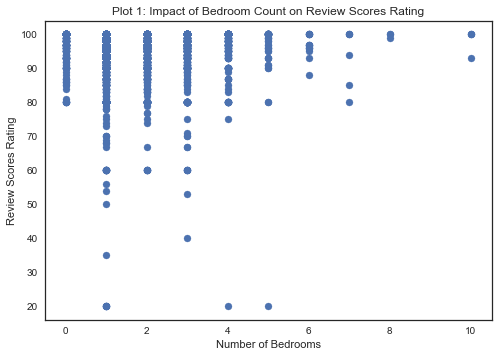

In [2]:
# Let's find some interesting datapoints that might have an affect on a host's review_scores_rating

# Create a new dataframe with a subset of the data
df_bedrooms = df.loc[:,['review_scores_rating', 'bedrooms']]
df_bedrooms = df_bedrooms.dropna()

# Make a scatter plot
plt.scatter( df_bedrooms['bedrooms'], df_bedrooms['review_scores_rating'])
plt.ylabel('Review Scores Rating')
plt.xlabel('Number of Bedrooms')
plt.title('Plot 1: Impact of Bedroom Count on Review Scores Rating')
plt.show()

In [23]:
# Let's print the averages to get a better understanding.

df_bedrooms = df_bedrooms.dropna()

for number_of_bedrooms in range(11):
    average = df_bedrooms.loc[df_bedrooms['bedrooms'] == number_of_bedrooms, 'review_scores_rating'].mean()
    message = 'Average Rating for {} bedroom(s): {}'.format(number_of_bedrooms, average)
    print(message)

Average Rating for 0 bedroom(s): 96.07486631016043
Average Rating for 1 bedroom(s): 95.13768485466599
Average Rating for 2 bedroom(s): 95.72704714640199
Average Rating for 3 bedroom(s): 95.61441441441441
Average Rating for 4 bedroom(s): 95.92537313432835
Average Rating for 5 bedroom(s): 95.24444444444444
Average Rating for 6 bedroom(s): 96.8
Average Rating for 7 bedroom(s): 93.16666666666667
Average Rating for 8 bedroom(s): 99.66666666666667
Average Rating for 9 bedroom(s): nan
Average Rating for 10 bedroom(s): 98.25


From the plot and the averages, it appears as though the bedroom count does not have a significant effect on the review scores rating.

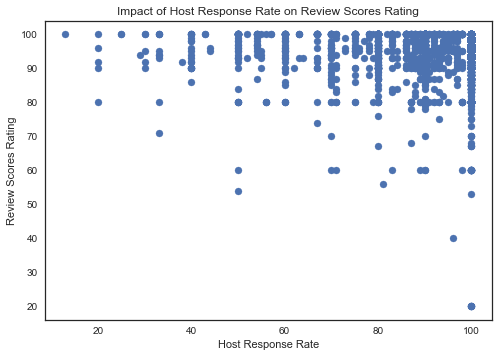

In [27]:
# Compare response rate to review_scores_rating
df_response = df.loc[:, ['host_response_rate', 'review_scores_rating']].dropna()

# Remove the % sign and convert the string to integer
df_response['host_response_rate'] = df_response['host_response_rate'].str.rstrip('%').astype(int)

# Create the scatter plot
plt.scatter(df_response['host_response_rate'], df_response['review_scores_rating'])
plt.ylabel('Review Scores Rating')
plt.xlabel('Host Response Rate')
plt.title('Impact of Host Response Rate on Review Scores Rating')
linregress(df_response['host_response_rate'], df_response['review_scores_rating'])
plt.show()

Maybe we should look somewhere else. 

Let's make a visualization using the host's verification status.

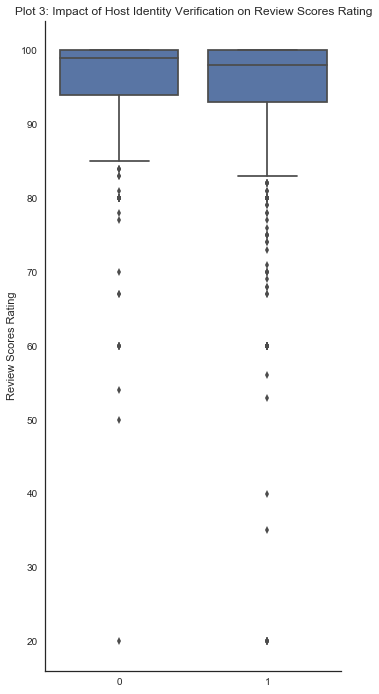

In [66]:
# Create a new dataframe with a subset of the data
df_ver = df.loc[:, ['host_identity_verified', 'review_scores_rating']]

# Convert the strings 't' and 'f' to boolean
df_ver['host_identity_verified'] = np.where(df_ver['host_identity_verified'] == 't', 1, 0)
df_box = df_ver.dropna()

# Making another dataframe for the cell below
df_cleaned = df_box

# Create the box plot
df_box = pd.melt(df_box, id_vars = ['host_identity_verified'], value_vars = ['review_scores_rating'])
g = sns.FacetGrid(df_box, col='variable', size = 10, aspect = .5)
g = g.map(sns.boxplot, 'host_identity_verified', 'value')
sns.plt.title('Plot 3: Impact of Host Identity Verification on Review Scores Rating')
g.set(xlabel = '', ylabel = 'Review Scores Rating')
plt.show()

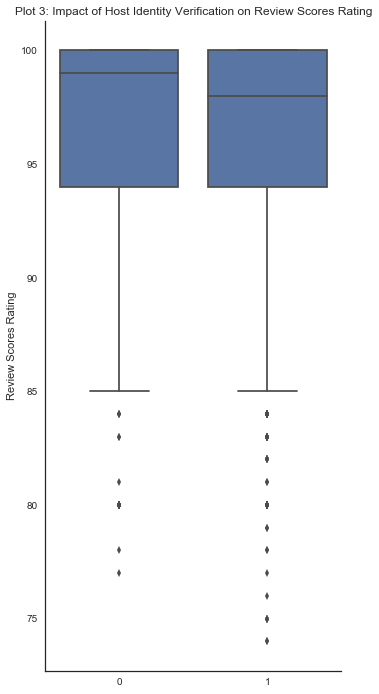

In [67]:
# Maybe we should drop some of the outliers that are skewing the results. 

# Keep only the review scores ratings that are within three standard deviations
df_cleaned = df_cleaned[np.abs(df_cleaned['review_scores_rating']-df_cleaned['review_scores_rating'].mean()) <= (3*df['review_scores_rating'].std())]

# Create the box plot
df_cleaned = pd.melt(df_cleaned, id_vars = ['host_identity_verified'], value_vars = ['review_scores_rating'])
g = sns.FacetGrid(df_cleaned, col='variable', size = 10, aspect = .5)
g = g.map(sns.boxplot, 'host_identity_verified', 'value')
sns.plt.title('Plot 3: Impact of Host Identity Verification on Review Scores Rating')
g.set(xlabel = '', ylabel = 'Review Scores Rating')
plt.show()

It appears as though the verification status does not have a significant impact on the review_scores_rating. This report proposes a deeper search into whether or not the host's verification status has an impact on review_scores_rating. If the null hypothesis is verified to be true, further research could be conducted to determine what factors have the largest impact on review_scores_rating. 